In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import operator

In [2]:
## Laod the data a
row_data = pd.read_csv('C:/Users/xuyua/Downloads/cancer.csv')
row_data.head(10)



,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [3]:
##Checking the missing values
row_data.shape[0] - row_data.count()


Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [4]:
## Totally there are 16 missing values and the total data is 699 rows and we can use mean values to replace these missing values 
## Or just drop them ,because I lack of the domain knowledge of the value so I choose to drop these 16 rows
df = row_data.dropna()
df.shape[0]

683

In [5]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [6]:
## Then we set these data into 2 sets randomly and let the training set has 70% data, test set has 30% data
## There has no relationship between the data sequence and the "Class", so there is no need to random shuffle the data
def randsplit(dataset,rate=0.7):
    n = dataset.shape[0]
    m = int(n*rate)
    train = dataset.iloc[:m,:]
    test = dataset.iloc[m:,:]
    test.index = range(test.shape[0])
    return train,test

In [7]:
train,test = randsplit(df)
train.shape

(478, 11)

In [8]:
## Build the KNN model
## train is the training set, test is test set, k is the number of k neighbors
def KNN(train,test,k):
    n = train.shape[1]-1 ## number of features
    m = test.shape[0]    ## sample set
    result = []
    for i in range(m):
        ## Find the range between the sample data and all other test data
        dist = list((((train.iloc[:, :n] - test.iloc[i, :n]) ** 2).sum(1))**0.5)
        ## Put the distances and related labels in a dictionary 
        dist_1 = pd.DataFrame({"dist":dist,"labels":(train.iloc[:,n])})
        ## Compare the first K distance
        dr = dist_1.sort_values(by = "dist")[:k]
        ## Get the labels
        re = dr.loc[:,"labels"].value_counts()
        result.append(re.index[0])
    ## Add new colunm to the original dataframe
    result = pd.Series(result)
    res = test.copy()
    res.loc[:,"predict"] = result
    acc = (res.iloc[:,-1]==res.iloc[:,-2]).mean()
    print(f"The Accuration is {acc}")
    return res,acc
   
      

In [9]:
## test our model with k=10
knn= KNN(train,test,10)

The Accuration is 0.4585365853658537


The Accuration is 0.4585365853658537
The Accuration is 0.5121951219512195
The Accuration is 0.5170731707317073
The Accuration is 0.5609756097560976
The Accuration is 0.5317073170731708
The Accuration is 0.751219512195122
The Accuration is 0.751219512195122
The Accuration is 0.751219512195122
The Accuration is 0.7365853658536585
The Accuration is 0.751219512195122
15
0.751219512195122


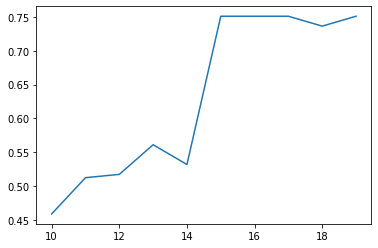

In [10]:
## build a function for k to find out the best k
score = []
krange = range(10,20)
for i in krange:
    res,acc = KNN(train,test,i)
    score.append(acc)
plt.plot(krange,score)
bestk = krange[score.index(max(score))]
print(bestk)
print(max(score))



In [ ]:
## We can found out that the accuracy increased a lot when K change to 15 and then the accuracy doesn't change that much. 
## So I choose K=15 AS the model's parameter.